We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.


Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.

Data Description:
Ge given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock ed in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchangeWe usenly 2020 data and predict with 2021 Q1 data.

In today’s data-driven world, we want to forecast future values based on historical data. Time series analysis provides a framework for building a model and predict the trends and patterns. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.plotting import autocorrelation_plot

#### Data Preparation 

Read data for various stocks and create dataframes for each. Various share/stock symbols
sber
kchol
mnhd
beef3
pamp
ccb
impj
dsmc

In [2]:
df_sber = pd.read_excel("stocks.xlsx",sheet_name="SBER")

In [3]:
df_kchol = pd.read_excel("stocks.xlsx",sheet_name="KCHOL")

In [4]:
df_mnhd = pd.read_excel("stocks.xlsx",sheet_name="MNHD")

In [5]:
df_beef3 = pd.read_excel("stocks.xlsx",sheet_name="BEEF3")

In [6]:
df_pamp = pd.read_excel("stocks.xlsx",sheet_name="PAMP")

In [7]:
df_ccb = pd.read_excel("stocks.xlsx",sheet_name="CCB")

In [8]:
df_impj = pd.read_excel("stocks.xlsx",sheet_name="IMPJ")

In [9]:
df_dsmc = pd.read_excel("stocks.xlsx",sheet_name="DSMC")

Read few records fot the dataframes

In [10]:
df_sber.tail()

,Date,Price,Open,High,Low,Vol.,Change %
307,2020-01-09 00:00:00,257.99,259.4,261.76,257.01,38.33M,-0.0045
308,2020-01-08 00:00:00,259.15,253.57,259.15,253.03,40.82M,0.0207
309,2020-01-06 00:00:00,253.9,254.75,254.84,251.4,22.35M,-0.0043
310,2020-01-03 00:00:00,255,255.99,258.19,253.7,35.85M,0.0010
311,Highest: 296.07,Lowest: 172.15,Difference: 123.92,Average: 234.52,Change %: 14.24,NaN,NaN


In [11]:
df_kchol.tail()

,Date,Price,Open,High,Low,Vol.,Change %
311,2020-01-07 00:00:00,19.93,20.22,20.28,19.92,2.89M,-0.0075
312,2020-01-06 00:00:00,20.08,20.34,20.34,19.97,1.94M,-0.0108
313,2020-01-03 00:00:00,20.3,20.3,20.44,19.97,3.31M,-0.0039
314,2020-01-02 00:00:00,20.38,20.42,20.44,20.24,2.53M,0.0030
315,Highest: 25.48,Lowest: 12.38,Difference: 13.10,Average: 17.86,Change %: -4.48,NaN,NaN


In [12]:
df_mnhd.tail()

,Date,Price,Open,High,Low,Vol.,Change %
301,2020-01-08 00:00:00,4.41,4.19,4.59,4.15,3.52M,0.0304
302,2020-01-06 00:00:00,4.28,4.16,4.44,4.12,2.52M,-0.0295
303,2020-01-05 00:00:00,4.41,4.7,4.7,4.33,3.76M,-0.0832
304,2020-01-02 00:00:00,4.81,4.81,4.87,4.78,241.60K,-0.0021
305,Highest: 4.92,Lowest: 2.40,Difference: 2.52,Average: 3.55,Change %: -22.20,NaN,NaN


In [13]:
df_beef3.tail()

,Date,Price,Open,High,Low,Vol.,Change %
305,2020-01-07 00:00:00,13.48,13.03,13.48,13.03,8.20M,0.0458
306,2020-01-06 00:00:00,12.89,12.9,12.91,12.57,4.17M,-0.0008
307,2020-01-03 00:00:00,12.9,12.45,12.93,12.27,4.88M,0.0263
308,2020-01-02 00:00:00,12.57,12.88,12.99,12.57,5.78M,-0.0210
309,Highest: 15.30,Lowest: 5.81,Difference: 9.49,Average: 11.38,Change %: -20.56,NaN,NaN


In [14]:
df_pamp.tail()

,Date,Price,Open,High,Low,Vol.,Change %
296,2020-01-07 00:00:00,47.6,48.35,49,46.9,901.95K,-0.0186
297,2020-01-06 00:00:00,48.5,48.4,48.7,47,719.24K,-0.0061
298,2020-01-03 00:00:00,48.8,48.25,49.45,46.5,595.36K,0.0114
299,2020-01-02 00:00:00,48.25,49.35,50.2,47.55,878.50K,-0.0292
300,Highest: 90.000,Lowest: 32.000,Difference: 58.000,Average: 61.244,Change %: 71.328,NaN,NaN


In [15]:
df_ccb.tail()

,Date,Price,Open,High,Low,Vol.,Change %
299,2020-01-08 00:00:00,6880,6940,6950,6880,84.93K,-0.0101
300,2020-01-07 00:00:00,6950,6950,6950,6850,168.71K,-0.0071
301,2020-01-03 00:00:00,7000,7040,7100,6960,470.77K,-0.0169
302,2020-01-02 00:00:00,7120,7300,7300,7120,138.96K,-0.0247
303,"Highest: 7,300.0","Lowest: 2,415.0","Difference: 4,885.0","Average: 4,836.5",Change %: -29.5,NaN,NaN


In [16]:
df_impj.tail()

,Date,Price,Open,High,Low,Vol.,Change %
310,2020-01-07 00:00:00,14500,14688,14688,13940,3.94M,-0.0082
311,2020-01-06 00:00:00,14620,14985,15045,14574,2.61M,-0.0150
312,2020-01-03 00:00:00,14843,14700,14884,14360,3.19M,0.0358
313,2020-01-02 00:00:00,14330,14525,14764,14325,2.01M,-0.0015
314,"Highest: 29,777","Lowest: 4,476","Difference: 25,301","Average: 16,018",Change %: 91,NaN,NaN


In [17]:
df_dsmc.tail()

,Date,Price,Open,High,Low,Vol.,Change %
337,2020-01-07 00:00:00,5690,5740,5770,5650,303.89K,-0.0070
338,2020-01-06 00:00:00,5730,5890,5890,5680,319.88K,-0.0288
339,2020-01-03 00:00:00,5900,5870,5920,5830,230.40K,0.0085
340,2020-01-02 00:00:00,5850,5930,5980,5820,239.90K,-0.0168
341,"Highest: 14,200","Lowest: 2,780","Difference: 11,420","Average: 6,492",Change %: 129,NaN,NaN


In [18]:
# Convert values to float
def convert_to_float(df):
    df["Price"]= df["Price"].astype(float)
    df["Open"]= df["Open"].astype(float)
    df["High"]= df["High"].astype(float)
    df["Low"]= df["Low"].astype(float)


In [19]:
# Extract Day Month Week
from datetime import datetime

def get_day(current):
        day = current.day
        return day
def get_year(current):
        year = current.year
        return year

def get_month(current):
        month = current.month
        return month
    
def get_week(current):
        iso_calendar = current.isocalendar()
        week = iso_calendar[1]
        return week


Remove the last rows from dataframe which have the aggregate values

In [20]:
df_sber=df_sber[:-1]
df_kchol = df_kchol[:-1]
df_mnhd = df_mnhd[:-1]
df_beef3 = df_beef3[:-1]
df_pamp = df_pamp[:-1]
df_ccb = df_ccb[:-1]
df_impj = df_impj[:-1]
df_dsmc = df_dsmc[:-1]

In [21]:
convert_to_float(df_sber)
convert_to_float(df_kchol)
convert_to_float(df_mnhd)
convert_to_float(df_beef3)
convert_to_float(df_pamp)
convert_to_float(df_ccb)
convert_to_float(df_impj)
convert_to_float(df_dsmc)

In [22]:
df_sber["Month"]=df_sber["Date"].apply(get_month)
df_sber["Year"]=df_sber["Date"].apply(get_year)
df_sber["Day"]=df_sber["Date"].apply(get_day)
df_sber["Week"]=df_sber["Date"].apply(get_week)

df_kchol["Month"]=df_kchol["Date"].apply(get_month)
df_kchol["Year"]=df_kchol["Date"].apply(get_year)
df_kchol["Day"]=df_kchol["Date"].apply(get_day)
df_kchol["Week"]=df_kchol["Date"].apply(get_week)

df_mnhd["Month"]=df_mnhd["Date"].apply(get_month)
df_mnhd["Year"]=df_mnhd["Date"].apply(get_year)
df_mnhd["Day"]=df_mnhd["Date"].apply(get_day)
df_mnhd["Week"]=df_mnhd["Date"].apply(get_week)

df_beef3["Month"]=df_beef3["Date"].apply(get_month)
df_beef3["Year"]=df_beef3["Date"].apply(get_year)
df_beef3["Day"]=df_beef3["Date"].apply(get_day)
df_beef3["Week"]=df_beef3["Date"].apply(get_week)

df_pamp["Month"]=df_pamp["Date"].apply(get_month)
df_pamp["Year"]=df_pamp["Date"].apply(get_year)
df_pamp["Day"]=df_pamp["Date"].apply(get_day)
df_pamp["Week"]=df_pamp["Date"].apply(get_week)

df_ccb["Month"]=df_ccb["Date"].apply(get_month)
df_ccb["Year"]=df_ccb["Date"].apply(get_year)
df_ccb["Day"]=df_ccb["Date"].apply(get_day)
df_ccb["Week"]=df_ccb["Date"].apply(get_week)

df_impj["Month"]=df_impj["Date"].apply(get_month)
df_impj["Year"]=df_impj["Date"].apply(get_year)
df_impj["Day"]=df_impj["Date"].apply(get_day)
df_impj["Week"]=df_impj["Date"].apply(get_week)

df_dsmc["Month"]=df_dsmc["Date"].apply(get_month)
df_dsmc["Year"]=df_dsmc["Date"].apply(get_year)
df_dsmc["Day"]=df_dsmc["Date"].apply(get_day)
df_dsmc["Week"]=df_dsmc["Date"].apply(get_week)




#### Descriptive Statistics

In [23]:
df_dsmc.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year,Day,Week
0,2021-03-31 00:00:00,13650.0,13700.0,13750.0,13450.0,0.19K,0.0000,3,2021,31,13
1,2021-03-30 00:00:00,13650.0,13850.0,14200.0,13050.0,3.17M,0.0074,3,2021,30,13
2,2021-03-29 00:00:00,13550.0,12500.0,13800.0,12500.0,0.20K,0.1107,3,2021,29,13
3,2021-03-28 00:00:00,12200.0,12200.0,12200.0,12200.0,-,0.0000,3,2021,28,12
4,2021-03-26 00:00:00,12200.0,11500.0,12300.0,11350.0,2.34M,0.0796,3,2021,26,12


In [24]:
print(df_dsmc.describe())

              Price          Open          High           Low    Change %  \
count    341.000000    341.000000    341.000000    341.000000  341.000000   
mean    6491.774194   6485.381232   6625.351906   6357.287390    0.003187   
std     1989.697584   1966.249229   2026.491831   1935.762022    0.039583   
min     2780.000000   2785.000000   3280.000000   2780.000000   -0.162100   
25%     5310.000000   5310.000000   5400.000000   5200.000000   -0.014000   
50%     6200.000000   6180.000000   6320.000000   6080.000000    0.000000   
75%     7790.000000   7780.000000   7930.000000   7670.000000    0.014400   
max    13650.000000  13850.000000  14200.000000  13450.000000    0.300000   

            Month         Year         Day        Week  
count  341.000000   341.000000  341.000000  341.000000  
mean     5.709677  2020.202346   15.865103   23.384164  
std      3.595037     0.402339    8.654784   15.863450  
min      1.000000  2020.000000    1.000000    1.000000  
25%      3.000000  20

In [25]:
print(df_sber.describe())

            Price        Open        High         Low    Change %       Month  \
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000   
mean   234.524019  234.417846  237.314759  231.366141    0.000668    5.700965   
std     32.079847   32.058167   32.075624   32.076603    0.021931    3.598024   
min    174.270000  175.000000  182.200000  172.150000   -0.095700    1.000000   
25%    207.700000  207.215000  209.660000  204.475000   -0.010100    2.500000   
50%    229.140000  229.080000  231.950000  226.860000    0.000400    5.000000   
75%    264.380000  263.885000  267.255000  261.110000    0.012950    9.000000   
max    293.300000  294.860000  296.070000  291.500000    0.129000   12.000000   

              Year         Day        Week  
count   311.000000  311.000000  311.000000  
mean   2020.196141   15.922830   23.408360  
std       0.397717    8.682602   15.848592  
min    2020.000000    1.000000    1.000000  
25%    2020.000000    9.000000    9.000000  


Check for null values in the datasets

In [26]:
df_sber.isna().sum()
df_kchol.isna().sum()
df_mnhd.isna().sum()
df_beef3.isna().sum()
df_pamp.isna().sum()
df_ccb.isna().sum()
df_impj.isna().sum()
df_dsmc.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Month       0
Year        0
Day         0
Week        0
dtype: int64

Separate the datasets into dataset of 2020 as Training and 2021 ( Q1) as Test

In [27]:
df_sber_2020 = df_sber[df_sber["Year"]==2020]
df_sber_2021 = df_sber[df_sber["Year"]==2021]
df_kchol_2020 = df_kchol[df_kchol["Year"]==2020]
df_kchol_2021 = df_kchol[df_kchol["Year"]==2021]
df_mnhd_2020 = df_mnhd[df_mnhd["Year"]==2020]
df_mnhd_2021 = df_mnhd[df_mnhd["Year"]==2021]
df_beef3_2020 = df_beef3[df_beef3["Year"]==2020]
df_beef3_2021 = df_beef3[df_beef3["Year"]==2021]
df_pamp_2020 = df_pamp[df_pamp["Year"]==2020]
df_pamp_2021 = df_pamp[df_pamp["Year"]==2021]
df_ccb_2020 = df_ccb[df_ccb["Year"]==2020]
df_ccb_2021 = df_ccb[df_ccb["Year"]==2021]
df_impj_2020 = df_impj[df_impj["Year"]==2020]
df_impj_2021 = df_impj[df_impj["Year"]==2021]
df_dsmc_2020 = df_dsmc[df_dsmc["Year"]==2020]
df_dsmc_2021 = df_dsmc[df_dsmc["Year"]==2021]

Text(0.5, 1.0, 'Stock value for DSMC')

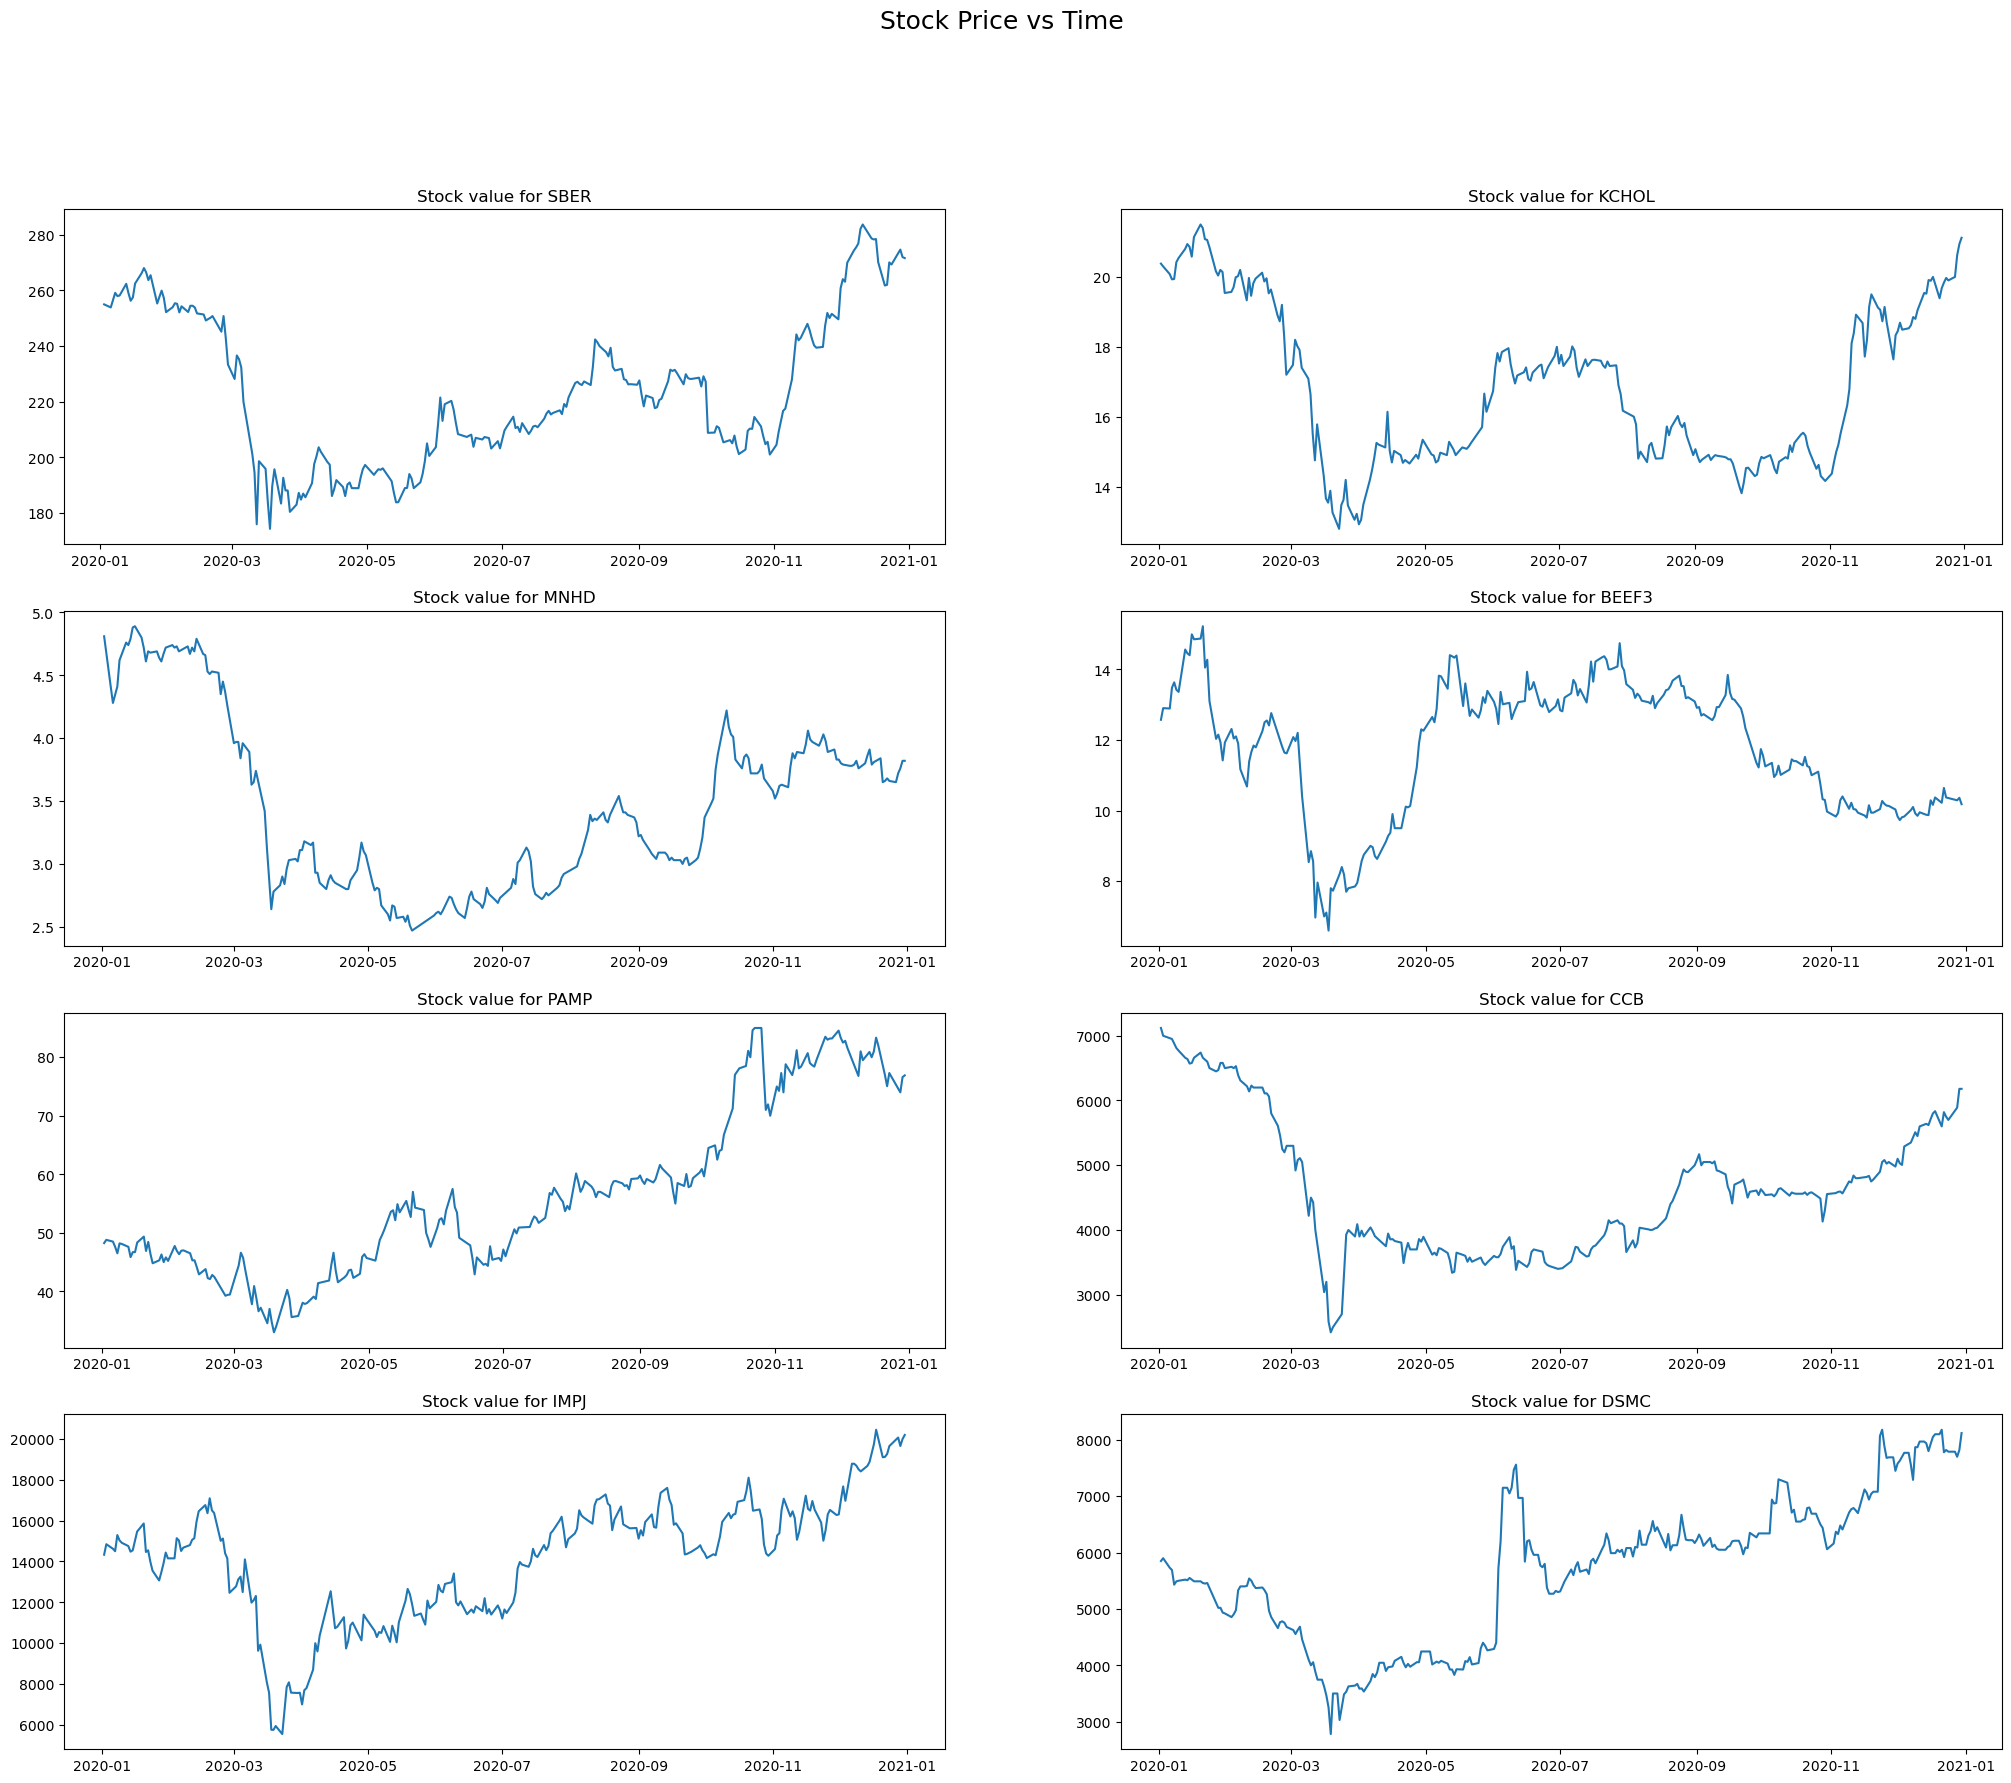

In [28]:
# Plot the Stock Prices with time
fig,ax = plt.subplots(4,2,figsize=(25,20))
plt.suptitle("Stock Price vs Time", fontsize=18)
ax[0,0].plot(df_sber_2020["Date"],df_sber_2020["Price"])
ax[0,0].set_title("Stock value for SBER")
ax[0,1].plot(df_kchol_2020["Date"],df_kchol_2020["Price"])
ax[0,1].set_title("Stock value for KCHOL")
ax[1,0].plot(df_mnhd_2020["Date"],df_mnhd_2020["Price"])
ax[1,0].set_title("Stock value for MNHD")
ax[1,1].plot(df_beef3_2020["Date"],df_beef3_2020["Price"])
ax[1,1].set_title("Stock value for BEEF3")
ax[2,0].plot(df_pamp_2020["Date"],df_pamp_2020["Price"])
ax[2,0].set_title("Stock value for PAMP")
ax[2,1].plot(df_ccb_2020["Date"],df_ccb_2020["Price"])
ax[2,1].set_title("Stock value for CCB")
ax[3,0].plot(df_impj_2020["Date"],df_impj_2020["Price"])
ax[3,0].set_title("Stock value for IMPJ")
ax[3,1].plot(df_dsmc_2020["Date"],df_dsmc_2020["Price"])
ax[3,1].set_title("Stock value for DSMC")


Text(0.5, 1.0, 'Stock value for DSMC')

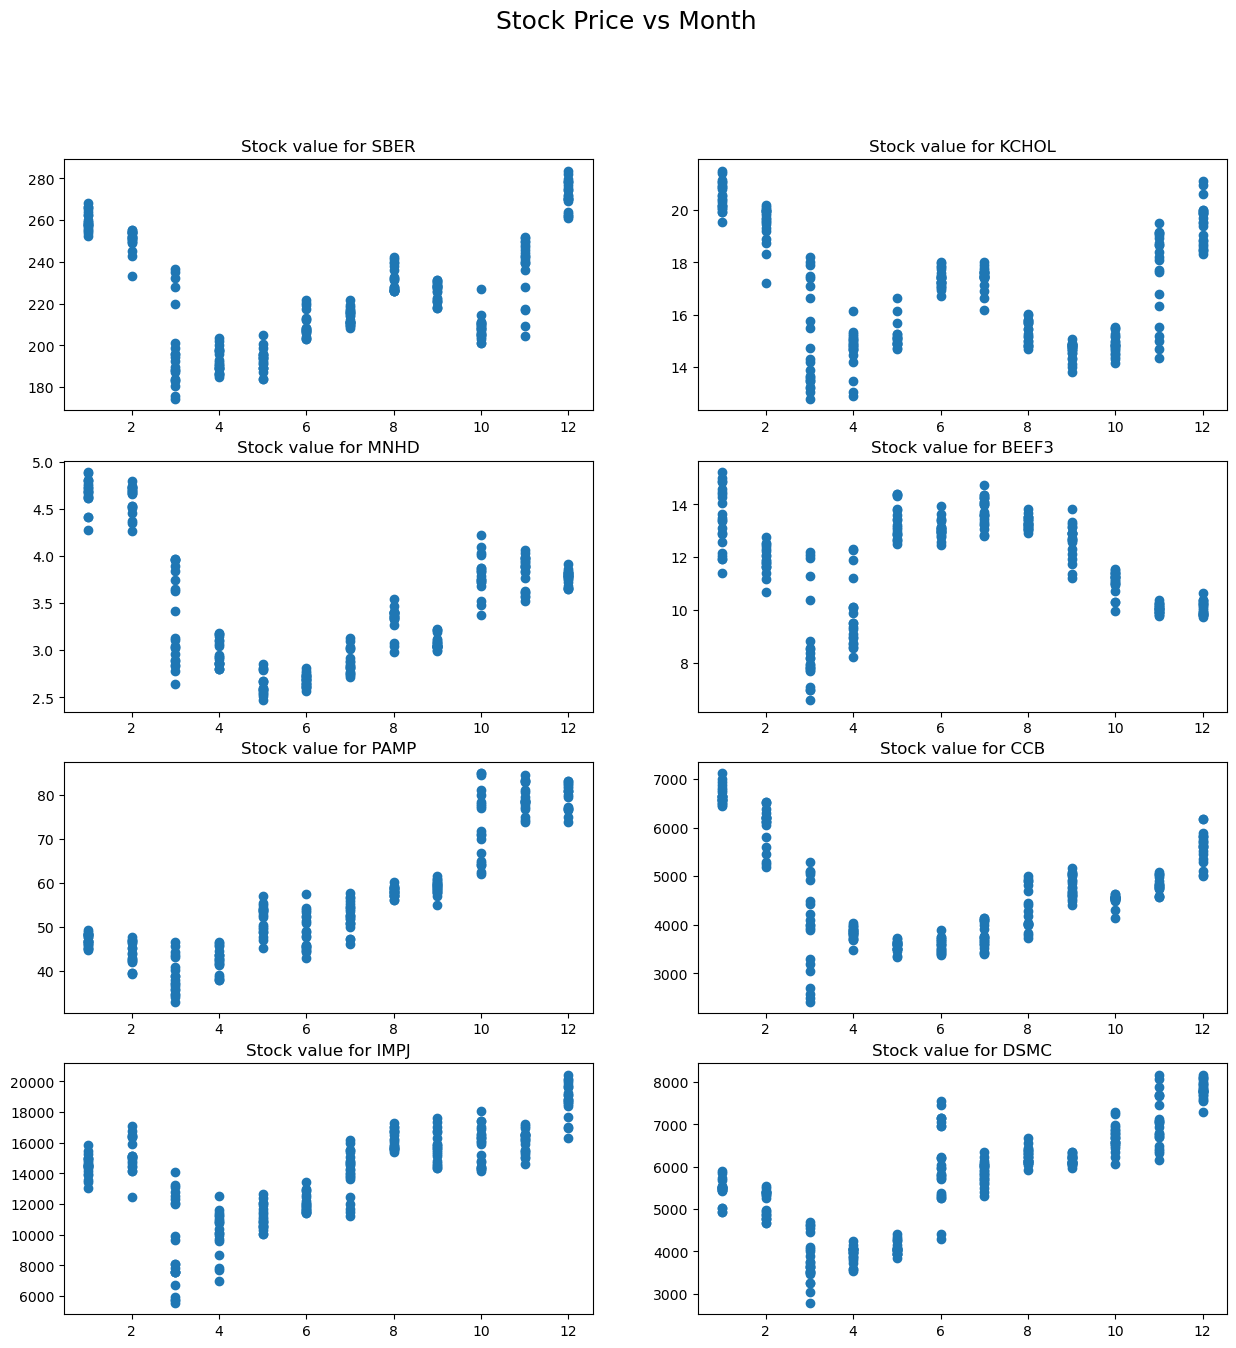

In [29]:
# Plot the stock prices each Month
fig,ax = plt.subplots(4,2,figsize=(15,15))
plt.suptitle("Stock Price vs Month", fontsize=18)
ax[0,0].scatter(df_sber_2020["Month"],df_sber_2020["Price"])
ax[0,0].set_title("Stock value for SBER")
ax[0,1].scatter(df_kchol_2020["Month"],df_kchol_2020["Price"])
ax[0,1].set_title("Stock value for KCHOL")
ax[1,0].scatter(df_mnhd_2020["Month"],df_mnhd_2020["Price"])
ax[1,0].set_title("Stock value for MNHD")
ax[1,1].scatter(df_beef3_2020["Month"],df_beef3_2020["Price"])
ax[1,1].set_title("Stock value for BEEF3")
ax[2,0].scatter(df_pamp_2020["Month"],df_pamp_2020["Price"])
ax[2,0].set_title("Stock value for PAMP")
ax[2,1].scatter(df_ccb_2020["Month"],df_ccb_2020["Price"])
ax[2,1].set_title("Stock value for CCB")
ax[3,0].scatter(df_impj_2020["Month"],df_impj_2020["Price"])
ax[3,0].set_title("Stock value for IMPJ")
ax[3,1].scatter(df_dsmc_2020["Month"],df_dsmc_2020["Price"])
ax[3,1].set_title("Stock value for DSMC")

In [30]:
df_sber_wplot = df_sber_2020['Price'].groupby(df_sber_2020['Week']).mean()
df_kchol_wplot = df_kchol_2020['Price'].groupby(df_kchol_2020['Week']).mean()
df_mnhd_wplot = df_kchol_2020['Price'].groupby(df_mnhd_2020['Week']).mean()
df_beef3_wplot = df_beef3_2020['Price'].groupby(df_beef3_2020['Week']).mean()
df_pamp_wplot = df_pamp_2020['Price'].groupby(df_pamp_2020['Week']).mean()
df_ccb_wplot = df_ccb_2020['Price'].groupby(df_ccb_2020['Week']).mean()
df_impj_wplot = df_impj_2020['Price'].groupby(df_impj_2020['Week']).mean()
df_dsmc_wplot = df_dsmc_2020['Price'].groupby(df_dsmc_2020['Week']).mean()

Text(0.5, 1.0, 'Stock value for DSMC')

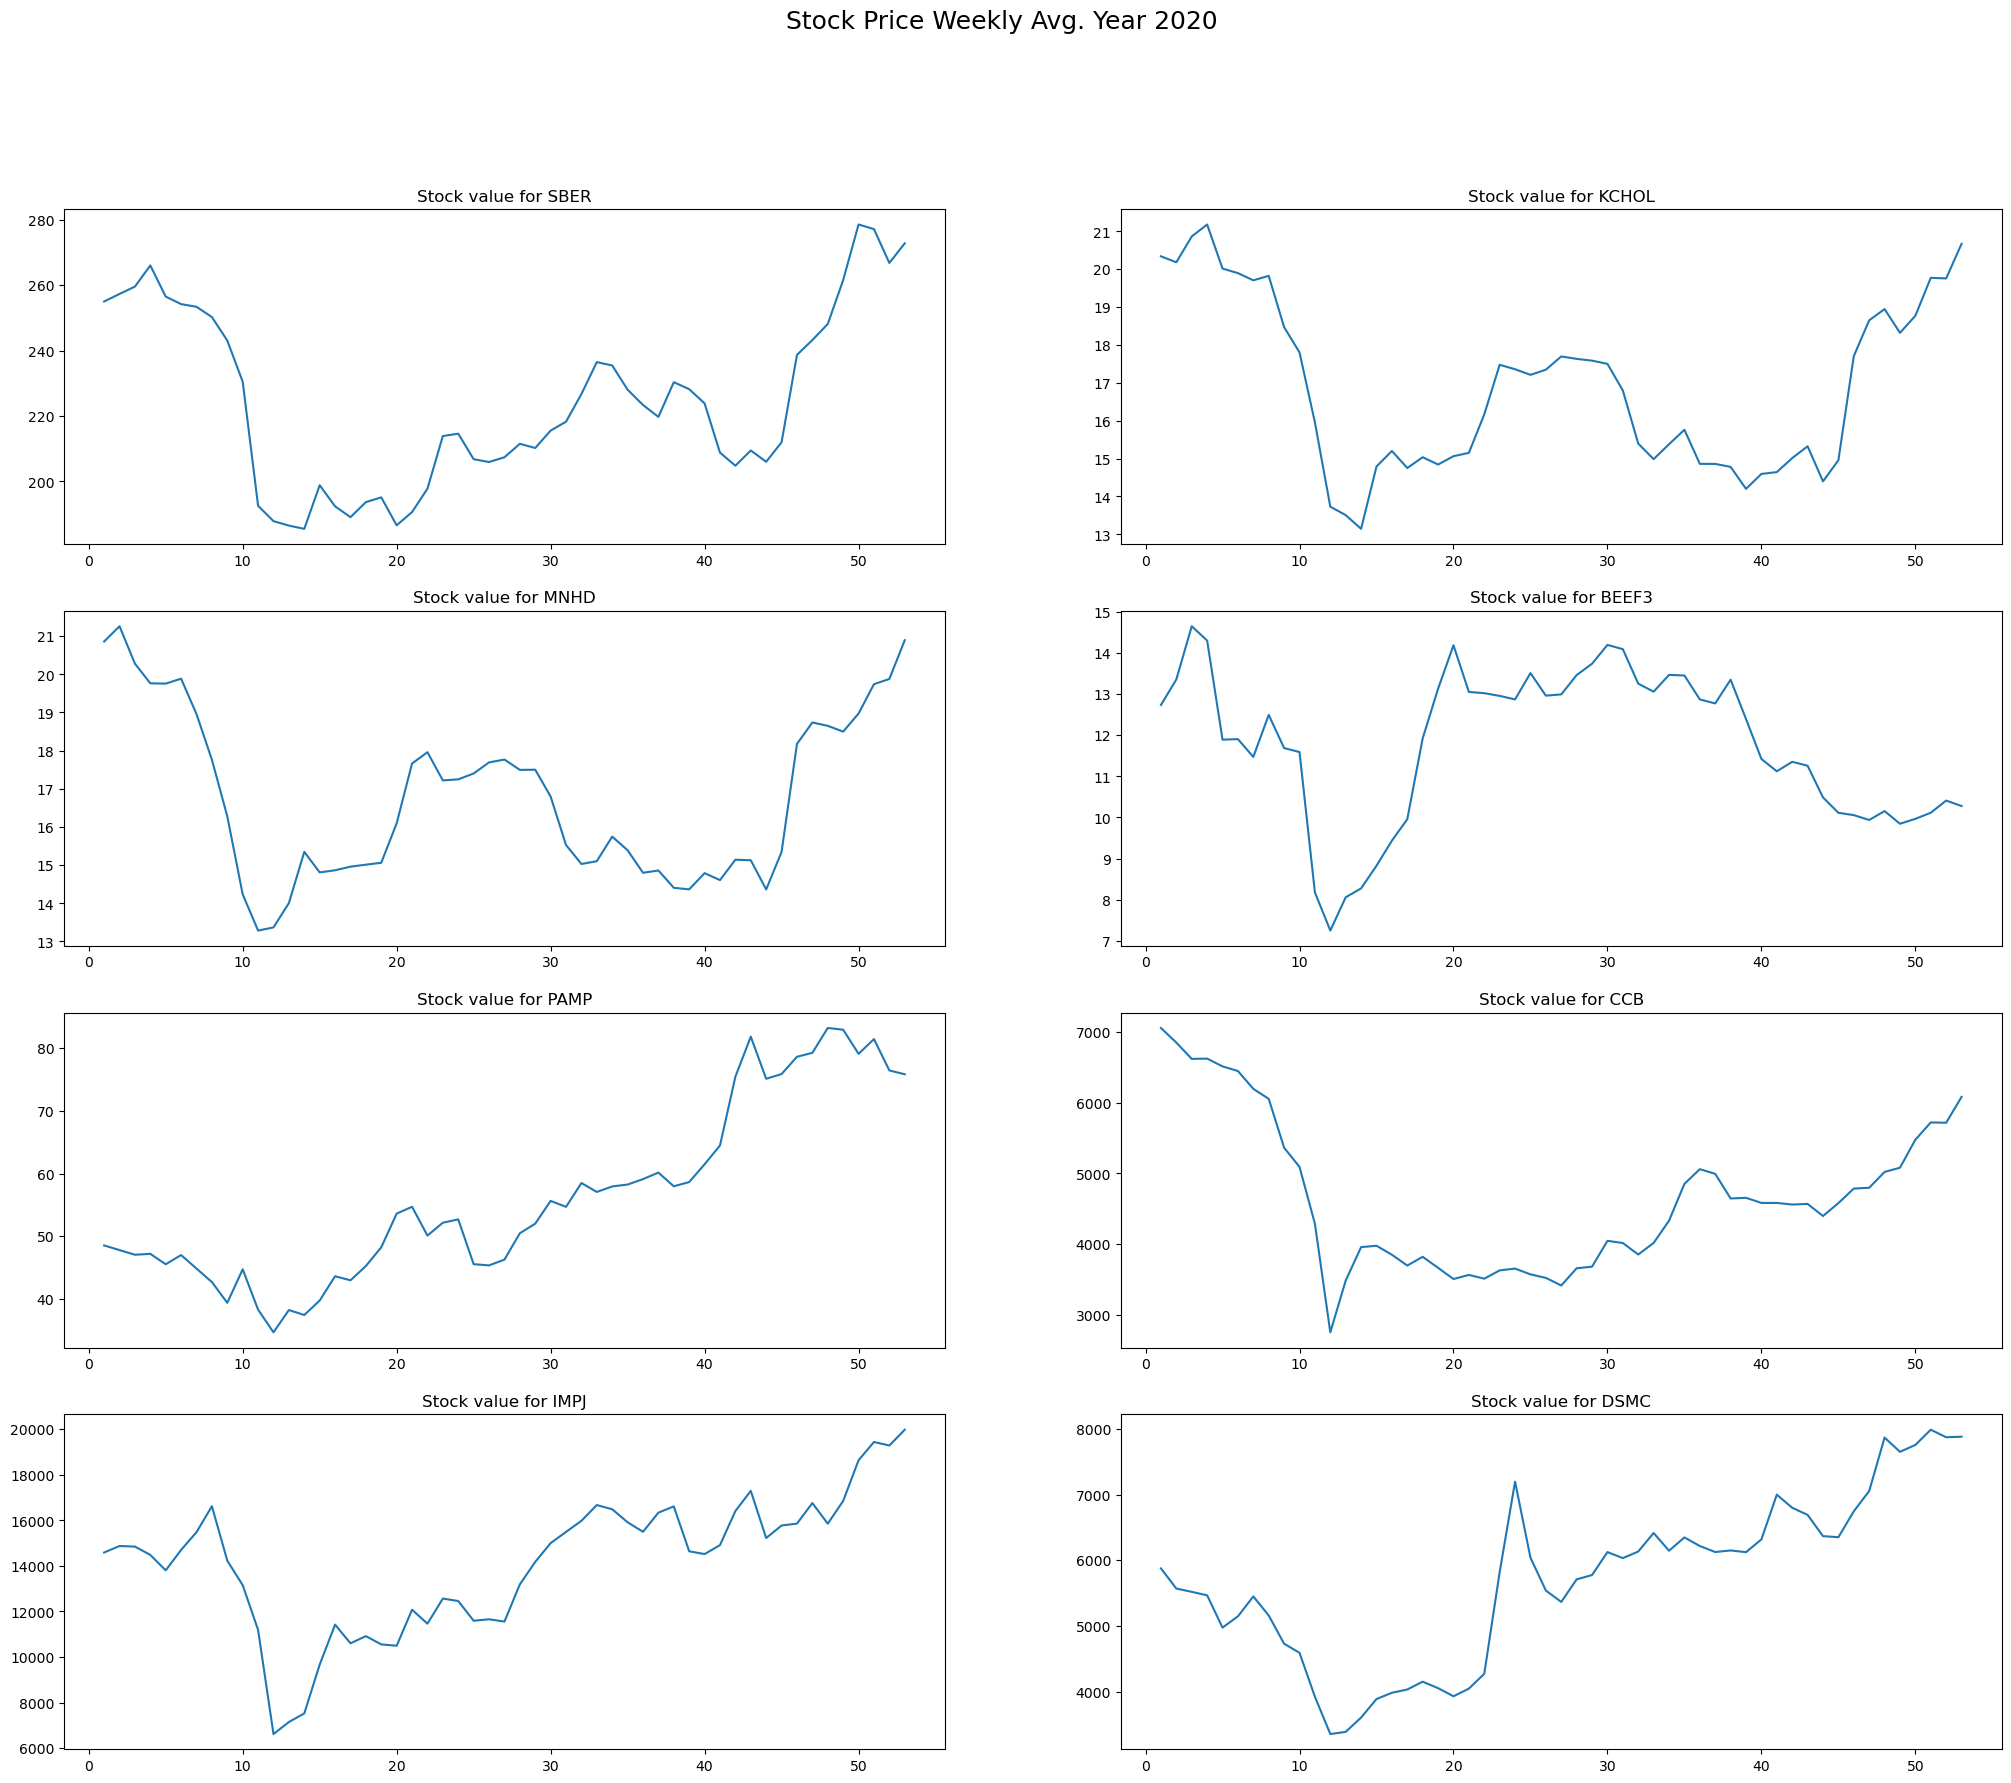

In [31]:
# Plot Mean stock Prices each week
fig,ax = plt.subplots(4,2,figsize=(25,20))
plt.suptitle("Stock Price Weekly Avg. Year 2020", fontsize=18)
ax[0,0].plot(df_sber_wplot)
ax[0,0].set_title("Stock value for SBER")
ax[0,1].plot(df_kchol_wplot)
ax[0,1].set_title("Stock value for KCHOL")
ax[1,0].plot(df_mnhd_wplot)
ax[1,0].set_title("Stock value for MNHD")
ax[1,1].plot(df_beef3_wplot)
ax[1,1].set_title("Stock value for BEEF3")
ax[2,0].plot(df_pamp_wplot)
ax[2,0].set_title("Stock value for PAMP")
ax[2,1].plot(df_ccb_wplot)
ax[2,1].set_title("Stock value for CCB")
ax[3,0].plot(df_impj_wplot)
ax[3,0].set_title("Stock value for IMPJ")
ax[3,1].plot(df_dsmc_wplot)
ax[3,1].set_title("Stock value for DSMC")

#### Stationarity test 

In [32]:
from statsmodels.tsa.stattools import adfuller

def test_adf(x):
    result = adfuller(x)
    print('ADF Statistic: %f' %result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("")

In [33]:
print("Stationary test for SBER")
test_adf(df_sber_2020["Price"])
print("Stationary test for KCHOL")
test_adf(df_kchol_2020["Price"])
print("Stationary test for MNHD")
test_adf(df_mnhd_2020["Price"])
print("Stationary test for BEEF3")
test_adf(df_beef3_2020["Price"])
print("Stationary test for PAMP")
test_adf(df_pamp_2020["Price"])
print("Stationary test for CCB")
test_adf(df_ccb_2020["Price"])
print("Stationary test for IMPJ")
test_adf(df_impj_2020["Price"])
print("Stationary test for DSMC")
test_adf(df_dsmc_2020["Price"])




Stationary test for SBER
ADF Statistic: -2.009693
p-value: 0.282339
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573

Stationary test for KCHOL
ADF Statistic: -1.666298
p-value: 0.448555
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573

Stationary test for MNHD
ADF Statistic: -0.585817
p-value: 0.874155
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573

Stationary test for BEEF3
ADF Statistic: -2.248392
p-value: 0.189153
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573

Stationary test for PAMP
ADF Statistic: -1.590725
p-value: 0.488251
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573

Stationary test for CCB
ADF Statistic: -0.641468
p-value: 0.861334
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573

Stationary test for IMPJ
ADF Statistic: -2.103505
p-value: 0.243107
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573

Stationary test for DSMC
ADF Statistic: -1.991824
p-value: 0.290169
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.572



The p-values are all > 0.05 , this shows a non-stationary

In [34]:
# Show the Trends and Seasonlity
from statsmodels.tsa.seasonal import seasonal_decompose
def seasonal(x):
    decompose = seasonal_decompose(x.Price, model='additive', extrapolate_trend='freq', period=120)
    decompose.plot().show()
    

Seasonal decompose SBER
Seasonal decompose KCHOL
Seasonal decompose MNHD
Seasonal decompose BEEF3
Seasonal decompose PAMP
Seasonal decompose CCB
Seasonal decompose IMPJ
Seasonal decompose DSMC


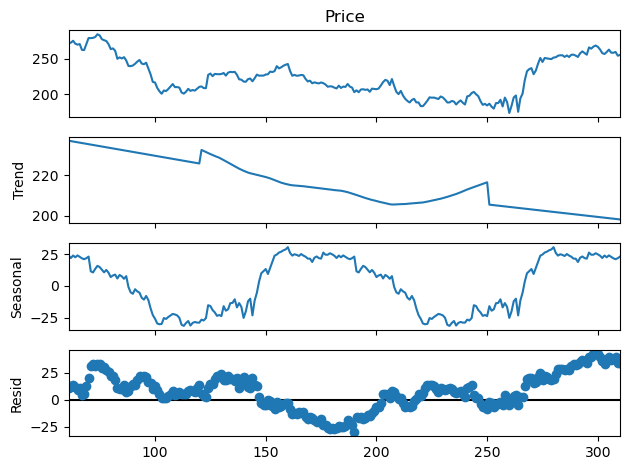

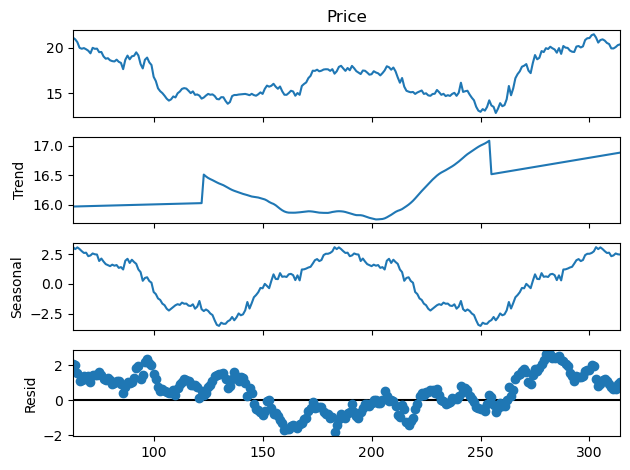

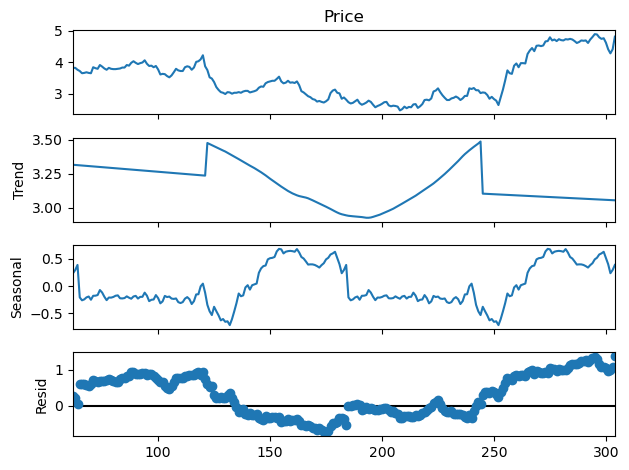

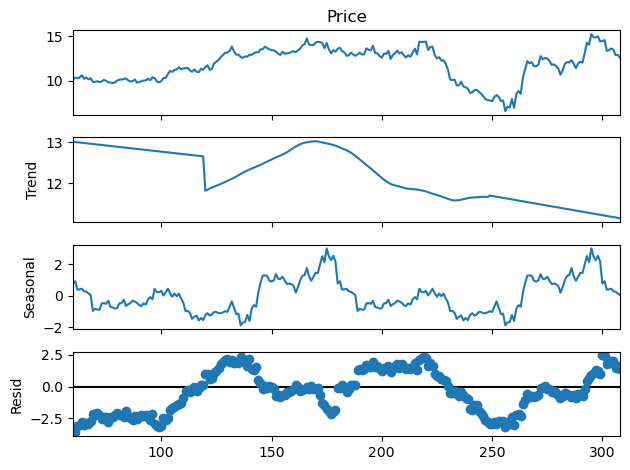

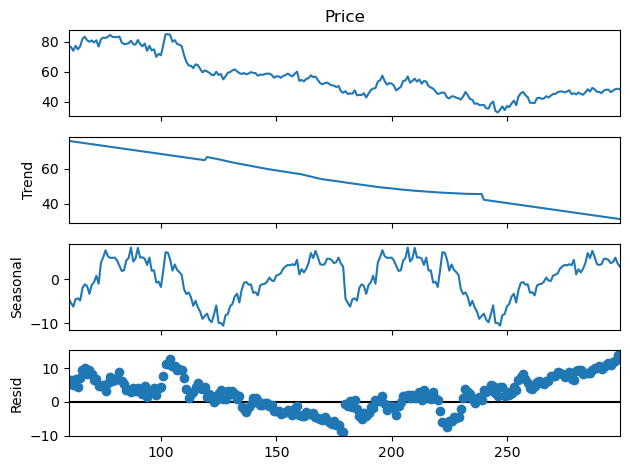

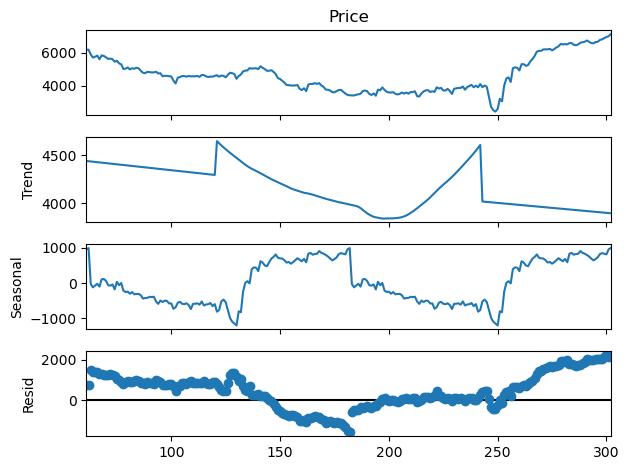

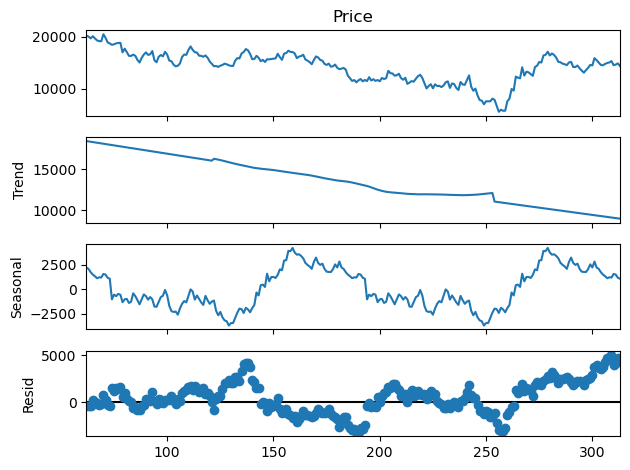

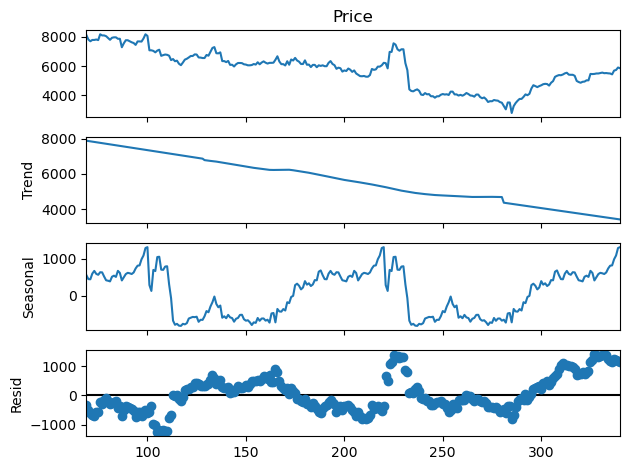

In [35]:
warnings.filterwarnings("ignore")
print("Seasonal decompose SBER")
seasonal(df_sber_2020)
print("Seasonal decompose KCHOL")
seasonal(df_kchol_2020)
print("Seasonal decompose MNHD")
seasonal(df_mnhd_2020)
print("Seasonal decompose BEEF3")
seasonal(df_beef3_2020)
print("Seasonal decompose PAMP")
seasonal(df_pamp_2020)
print("Seasonal decompose CCB")
seasonal(df_ccb_2020)
print("Seasonal decompose IMPJ")
seasonal(df_impj_2020)
print("Seasonal decompose DSMC")
seasonal(df_dsmc_2020)



There is no Seasonality as we looking at yearly data but there is trend for some of the datasets

#### Model development using Auto Arima

In [36]:
! pip install pmdarima

In [37]:
import pmdarima as pm

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()

In [41]:
# Model training function
def model_train(x1):
    x_train=x1[['Date']]
    y_train=x1[["Price"]]
    y_train_scaled = scaler.fit_transform(y_train)
    model = pm.auto_arima(
        y_train_scaled, 
        start_p=1,
        max_p=4, 
        star_q=1,
        max_q=5, 
        d=1,
        max_d=5,
        test='adf', 
        stepwise=True, 
        suppress_warnings=True, 
        error_action='warn', 
        seasonal=False, 
        random_state=42, 
        trace=True, 
        random=True,
        n_fits=50,) 
        
    len_train=len(x_train)
    model.fit_predict(y_train_scaled,n_periods=len_train)
    print(model.summary)
    y_train_pred =  model.fittedvalues()
    y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1,1))
    print("MSE for training data")
    print(mean_squared_error(y_train_pred,y_train))
    print("")
    print("MAE for training data")
    mae = np.mean(np.abs(y_train - y_train_pred))
    print(mae)
    plt.figure()
    plt.title("Training Actual vs Training Predicted")
    plt.plot(y_train_pred,color='blue',label='Predicted')
    plt.plot(y_train,color='green',label='Actual')
    plt.legend()
    return model

In [61]:
def model_forecast(y_test,model,period):
    y_test_pred = model.predict(n_periods=period)
    y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1,1))
    print("")
    print("Predicted values")
    # print(y_test_pred)
    return y_test_pred

#### Forecast for SBER

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-131.553, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-136.589, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-135.000, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-135.047, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-138.543, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-133.856, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.427 seconds
<bound method ARIMA.summary of ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>
MSE for training data
32.685768371841895

MAE for training data
3.5959348799616144


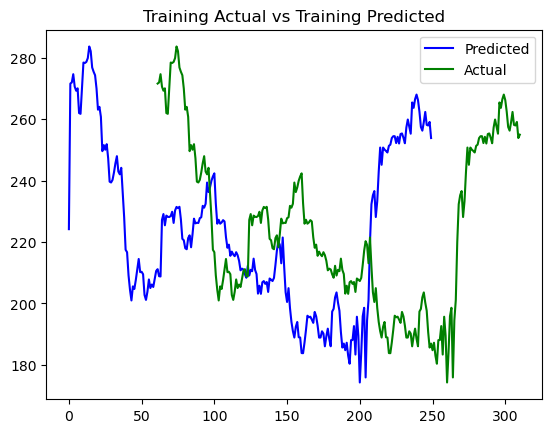

In [62]:
sber_model=model_train(df_sber_2020)


In [63]:
model_forecast(df_sber_2021,sber_model,7)


Predicted values


array([[255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.]])

#### Forecast for KCHOL

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-146.203, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-149.913, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-148.579, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-148.624, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-151.899, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-146.869, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.616 seconds
<bound method ARIMA.summary of ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>
MSE for training data
0.23080437317338126

MAE for training data
0.3185260770939078


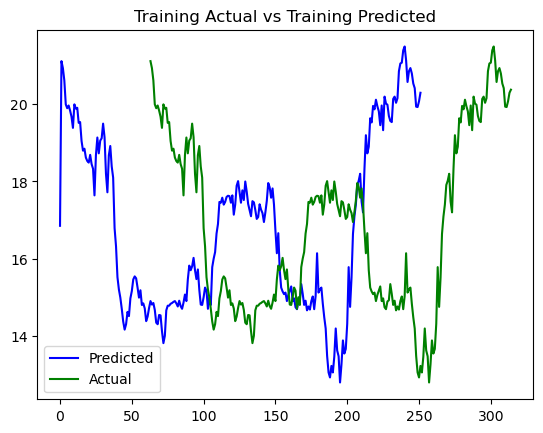

In [64]:
kchol_model=model_train(df_kchol_2020)



In [85]:
model_forecast(df_kchol_2021,kchol_model,7)


Predicted values


array([[7769.08777667],
       [7769.08777667],
       [7769.08777667],
       [7769.08777667],
       [7769.08777667],
       [7769.08777667],
       [7769.08777667]])

#### Forecast for MNHD

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-281.620, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-268.466, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-281.377, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-280.255, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-269.995, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-279.588, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-279.378, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-279.851, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-279.817, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-277.669, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-277.385, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-277.611, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-283.230, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-281.225, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]          

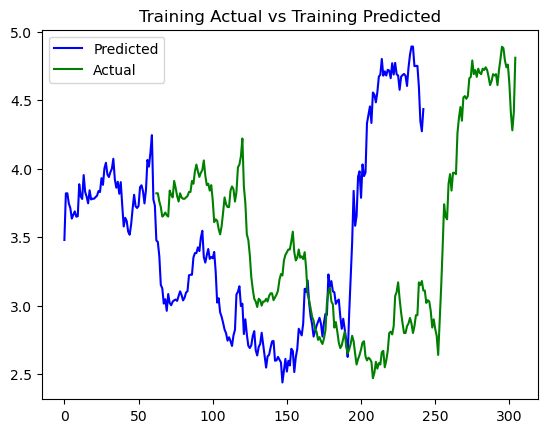

In [67]:
mnhd_model=model_train(df_mnhd_2020)


In [68]:
model_forecast(df_mnhd_2021,mnhd_model,7)


Predicted values


array([[4.92491708],
       [4.91861628],
       [4.92480159],
       [4.91872965],
       [4.9246903 ],
       [4.9188389 ],
       [4.92458305]])

#### Forecast for BEEF3

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-47.139, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-41.763, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-41.673, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-41.309, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-43.628, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-45.374, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-38.383, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-51.048, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-44.371, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-51.626, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-48.166, Time=0.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-49.993, Time=0.39 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-50.104, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-51.255, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-46.5

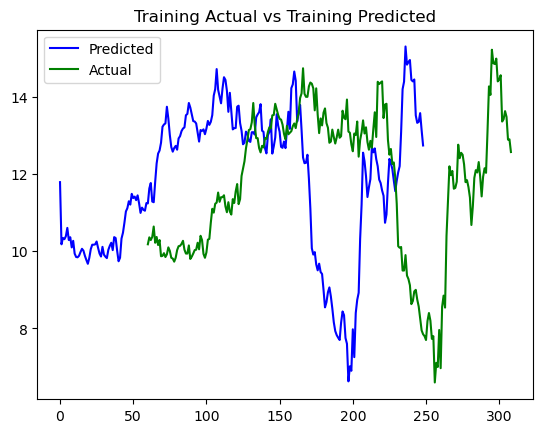

In [69]:
beef3_model=model_train(df_beef3_2020)

In [70]:
model_forecast(df_beef3_2021,beef3_model,7)


Predicted values


array([[12.35213924],
       [12.41337214],
       [12.47561022],
       [12.41409031],
       [12.39317058],
       [12.4327303 ],
       [12.43371188]])

#### Forecast for PAMP

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-218.139, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-221.459, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-220.619, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-220.552, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-222.662, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-219.968, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.444 seconds
<bound method ARIMA.summary of ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>
MSE for training data
6.1026755510007025

MAE for training data
1.651947048551199


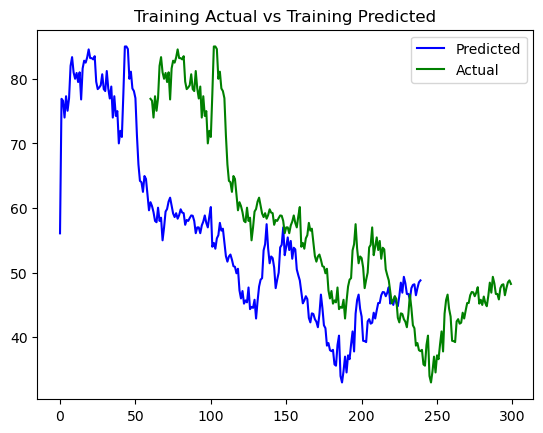

In [75]:
pamp_model=model_train(df_pamp_2020)

In [76]:
model_forecast(df_pamp_2021,pamp_model,7)


Predicted values


array([[48.25],
       [48.25],
       [48.25],
       [48.25],
       [48.25],
       [48.25],
       [48.25]])

#### Forecast for CCB

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-214.607, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-212.815, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-212.316, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-212.031, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-214.672, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-212.666, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.410 seconds
<bound method ARIMA.summary of ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>
MSE for training data
35476.613416861815

MAE for training data
107.86764906510808


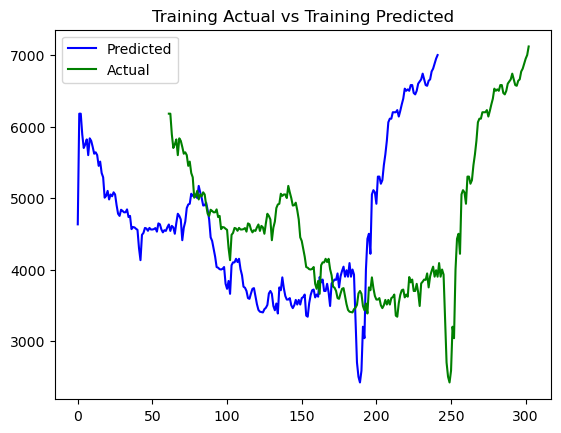

In [77]:
ccb_model=model_train(df_ccb_2020)

In [78]:
model_forecast(df_ccb_2021,ccb_model,7)


Predicted values


array([[7120.],
       [7120.],
       [7120.],
       [7120.],
       [7120.],
       [7120.],
       [7120.]])

#### Forecast for IMPJ

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-39.183, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-43.616, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-42.175, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-42.166, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-45.299, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-40.175, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.460 seconds
<bound method ARIMA.summary of ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>
MSE for training data
577588.4680828945

MAE for training data
516.5334309593413


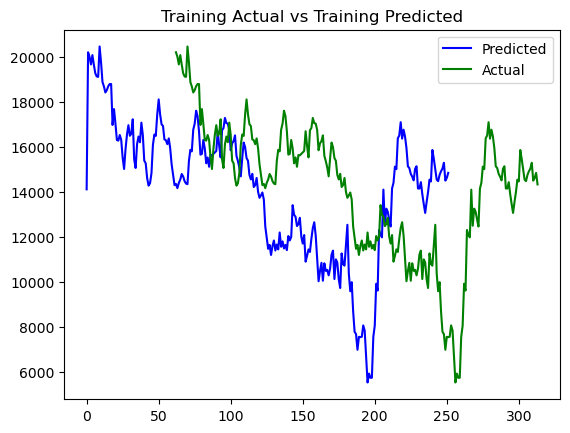

In [79]:
impj_model=model_train(df_impj_2020)

In [80]:
model_forecast(df_impj_2021,impj_model,7)


Predicted values


array([[14330.],
       [14330.],
       [14330.],
       [14330.],
       [14330.],
       [14330.],
       [14330.]])

#### Forecast for DSMC

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-198.746, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-202.863, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-201.191, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-201.147, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-204.443, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-200.010, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.491 seconds
<bound method ARIMA.summary of ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>
MSE for training data
66069.53448083249

MAE for training data
137.02550551225875


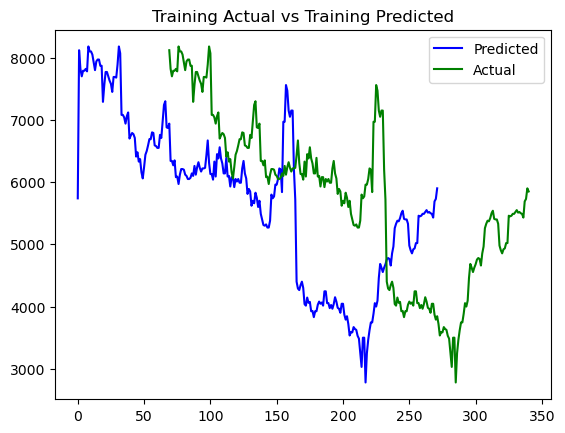

In [81]:
dsmc_model=model_train(df_dsmc_2020)

In [82]:
model_forecast(df_dsmc_2021,dsmc_model,7)


Predicted values


array([[5850.],
       [5850.],
       [5850.],
       [5850.],
       [5850.],
       [5850.],
       [5850.]])

#### Time Series Forecasting using Prophet

In [394]:
pip install pystan==2.19.1.1 prophet


  Using cached pystan-2.19.1.1-cp311-cp311-win_amd64.whl
  Using cached holidays-0.49-py3-none-any.whl.metadata (23 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 640.0 kB/s eta 0:00:21
   ---------------------------------------- 0.1/13.3 MB 656.4 kB/s eta 0:00:21
    --------------------------------------- 0.2/13.3 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.5/13.3 MB 2.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/13.3 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/13.3 MB 3.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/13.3 MB 4.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/13.3 MB 4.6 MB/s eta 0:00:03
   ------ --------------------------------- 2.2/13.3 MB 5.0 MB/s eta 0:00:03
   ------- -------------------------------

In [83]:
from prophet import Prophet

In [84]:
def prophet_forecast(xtrain,xtest):
    xtrain_f=xtrain[["Date","Price"]]
    xtrain_f=xtrain_f.rename(columns = {"Date":"ds"})
    xtrain_f=xtrain_f.rename(columns = {"Price":"y"})
    model = Prophet()
    model.fit(xtrain_f)
    xlen=len(xtest)
    df_future = model.make_future_dataframe(periods=xlen, freq='D')
    forecast_prophet = model.predict(df_future)
    forecast_plot =model.plot(forecast_prophet)
    plt.plot(xtest['Date'], xtest['Price'],'ro', markersize=3, label='Test Data')
    plt.legend()
    model.plot_components(forecast_prophet)
    return forecast_prophet

#### Forescast for share SBER

16:44:41 - cmdstanpy - INFO - Chain [1] start processing
16:44:41 - cmdstanpy - INFO - Chain [1] done processing


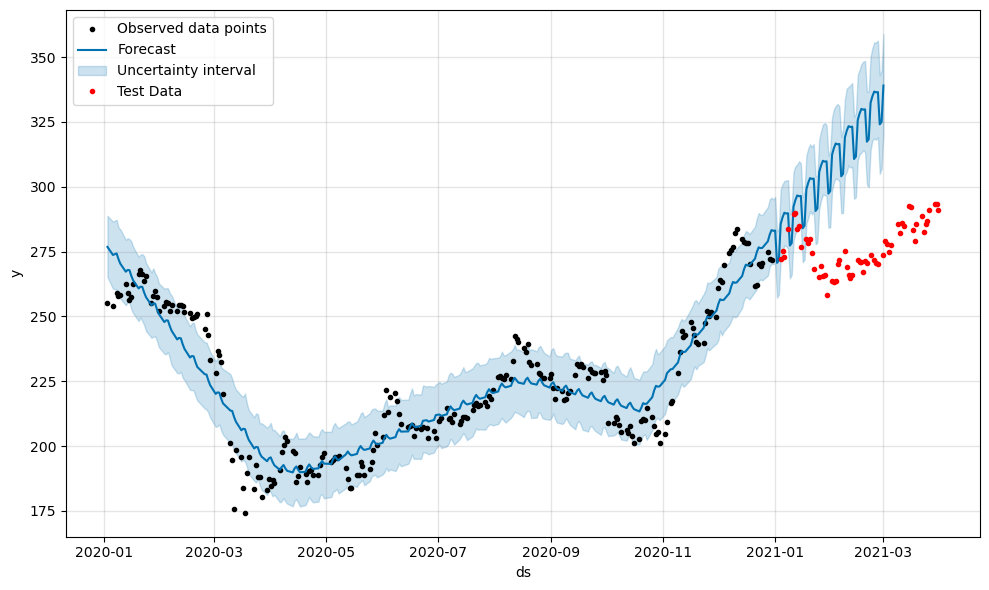

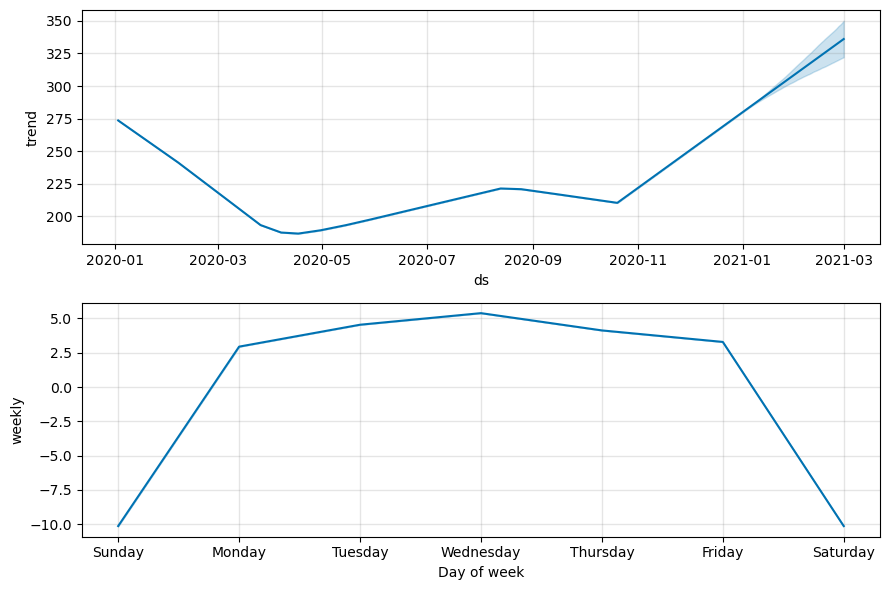

In [166]:
forecast_sber=prophet_forecast(df_sber_2020,df_sber_2021)

#### Forecast for KCHOL

16:44:44 - cmdstanpy - INFO - Chain [1] start processing
16:44:44 - cmdstanpy - INFO - Chain [1] done processing


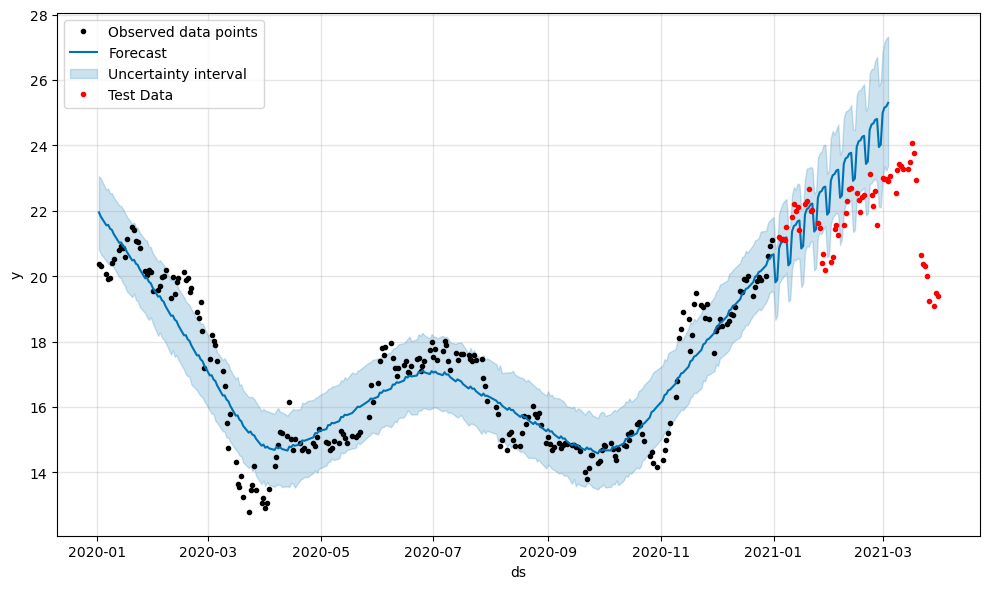

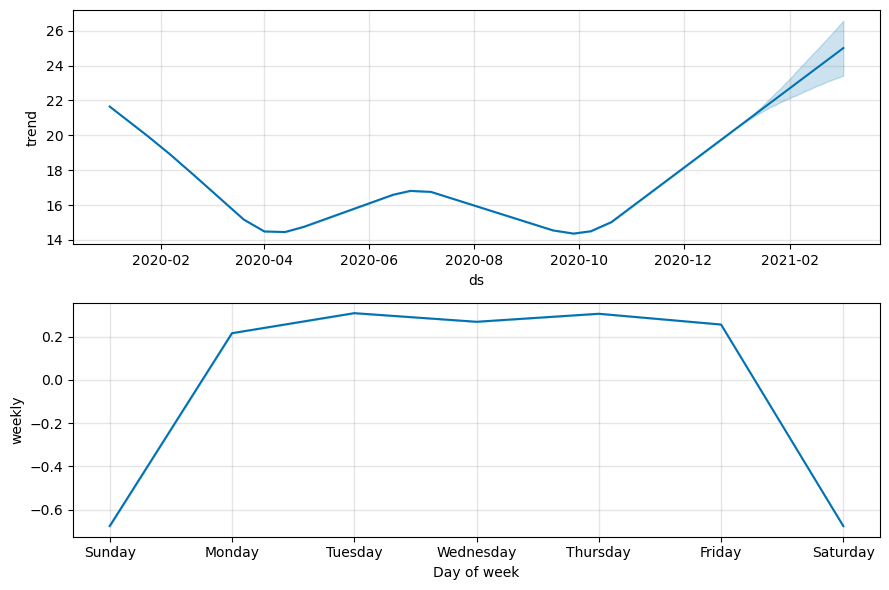

In [167]:
forecast_kchol=prophet_forecast(df_kchol_2020,df_kchol_2021)

# forecast_kchol

#### Forecast for MNHD

16:44:48 - cmdstanpy - INFO - Chain [1] start processing
16:44:48 - cmdstanpy - INFO - Chain [1] done processing


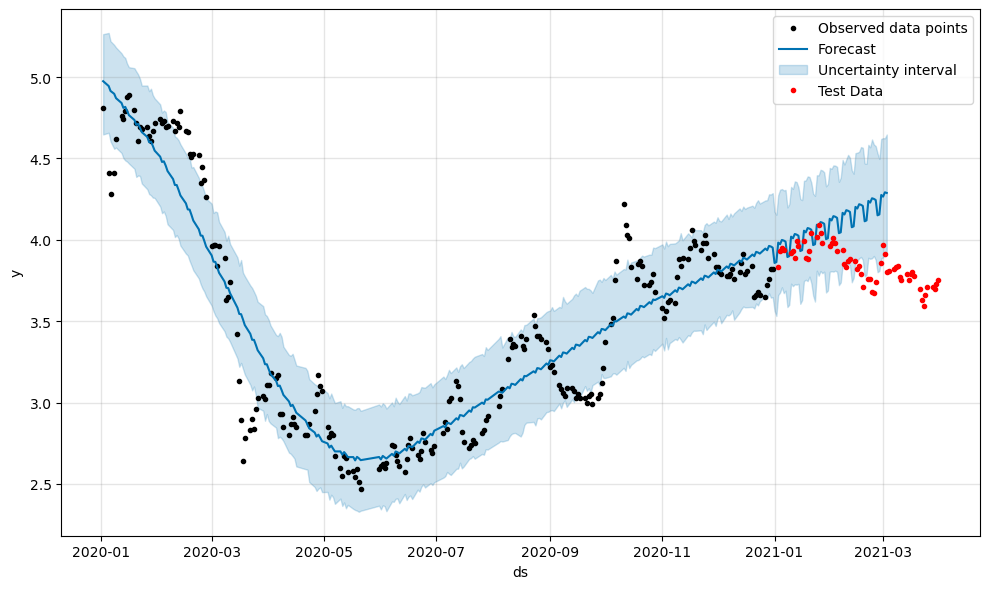

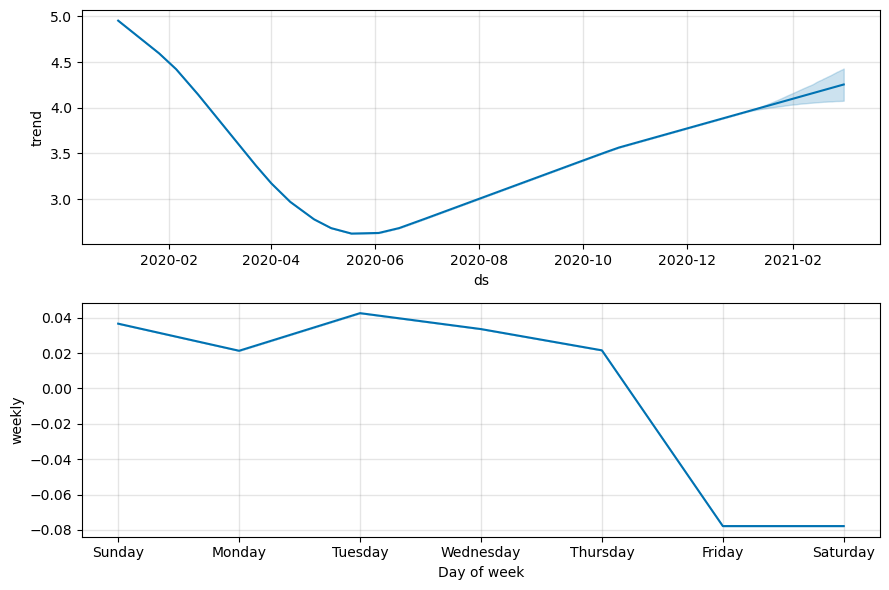

In [168]:
forecast_mnhd=prophet_forecast(df_mnhd_2020,df_mnhd_2021)

#### Forecast for BEEF3

16:45:10 - cmdstanpy - INFO - Chain [1] start processing
16:45:10 - cmdstanpy - INFO - Chain [1] done processing


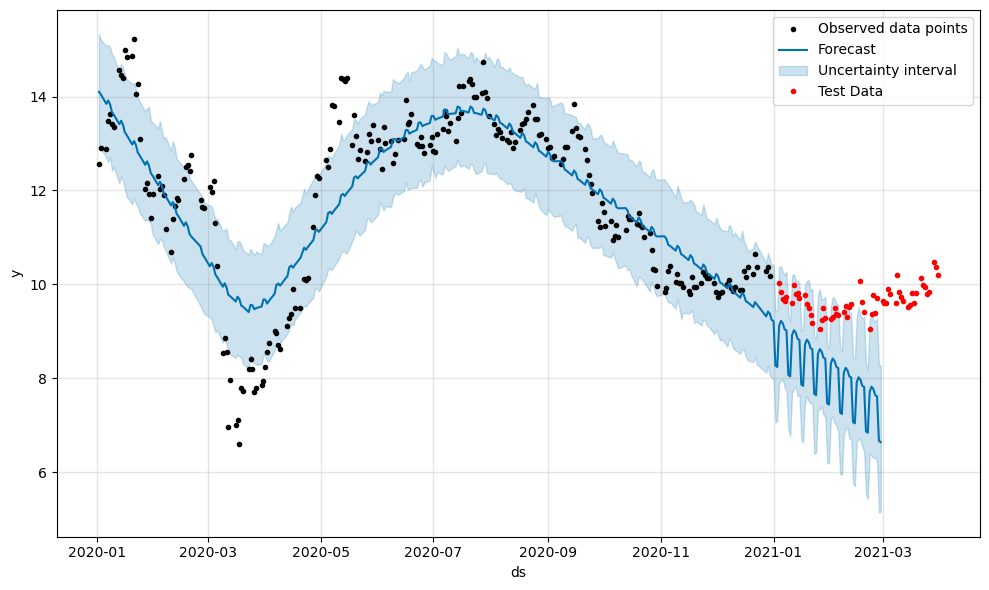

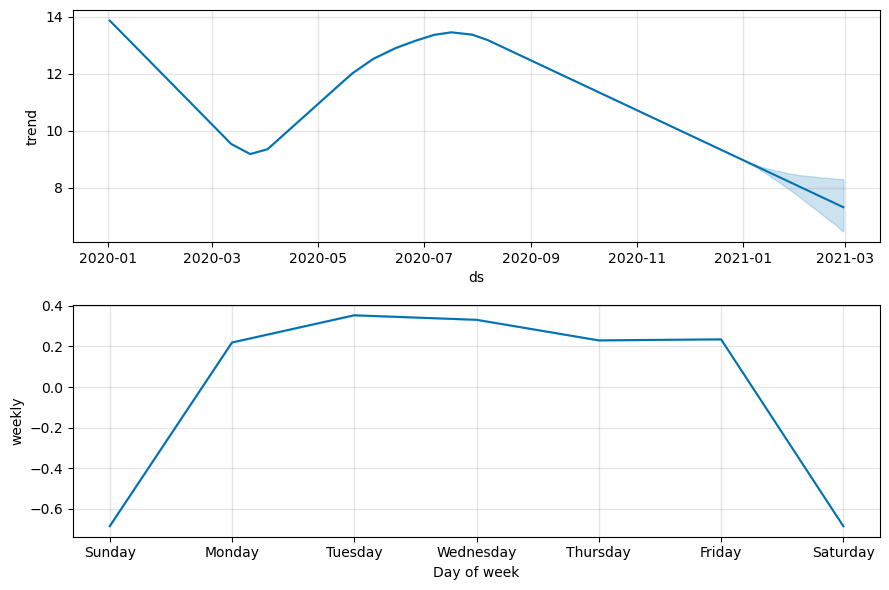

In [169]:
forecast_beef3=prophet_forecast(df_beef3_2020,df_beef3_2021)

#### Forecast for PAMP

16:45:11 - cmdstanpy - INFO - Chain [1] start processing
16:45:11 - cmdstanpy - INFO - Chain [1] done processing


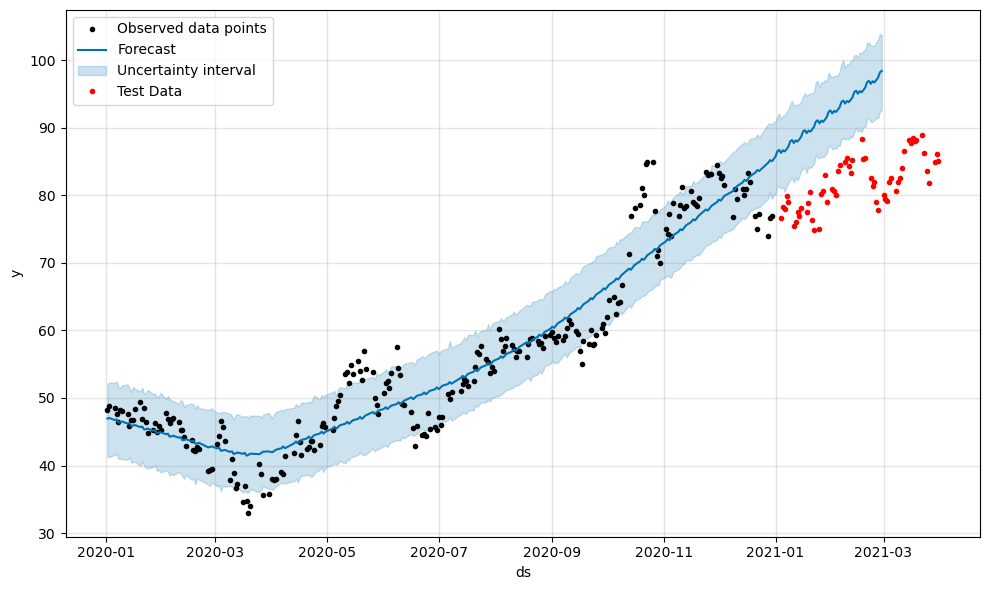

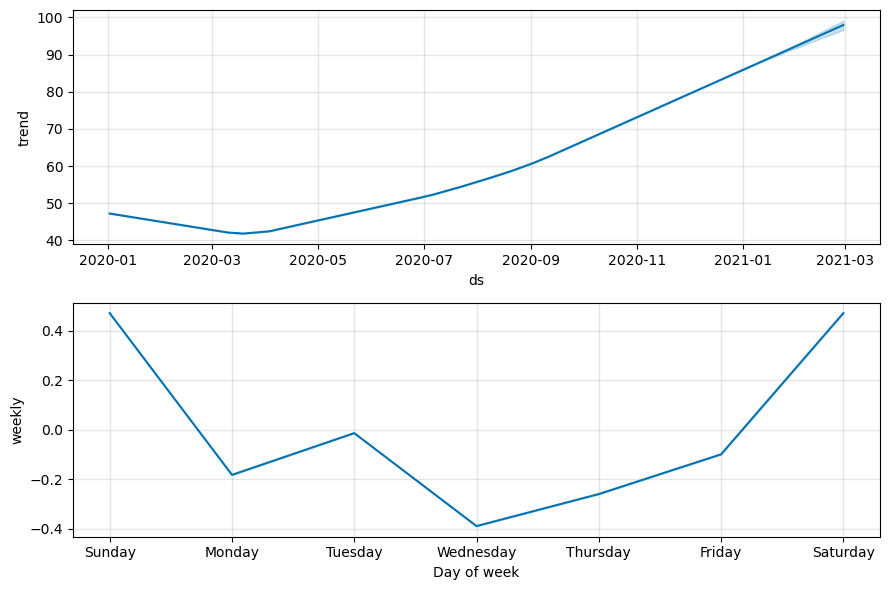

In [170]:
forecast_pamp=prophet_forecast(df_pamp_2020,df_pamp_2021)

#### Forecast for CCB

16:45:12 - cmdstanpy - INFO - Chain [1] start processing
16:45:12 - cmdstanpy - INFO - Chain [1] done processing


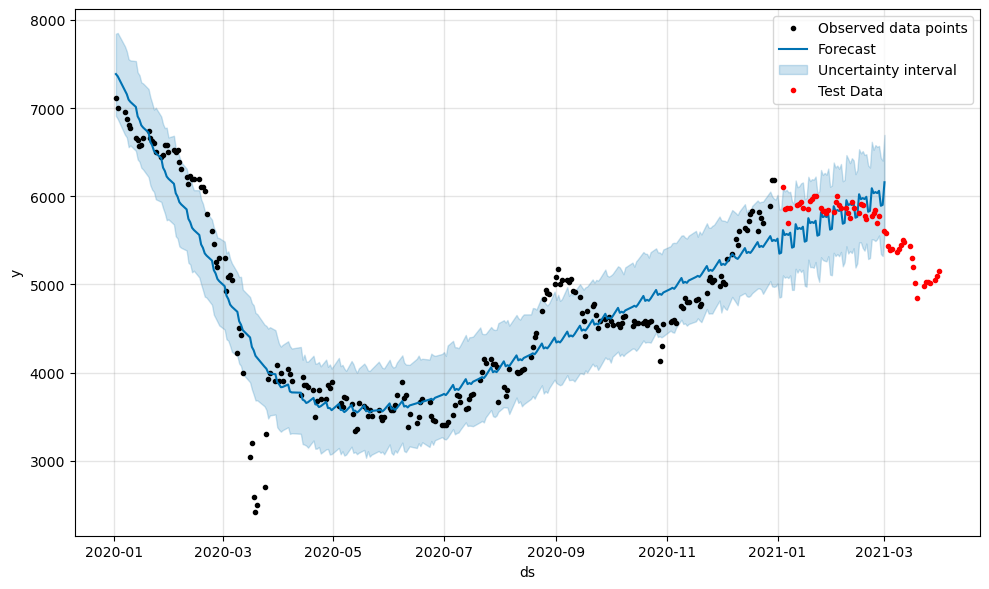

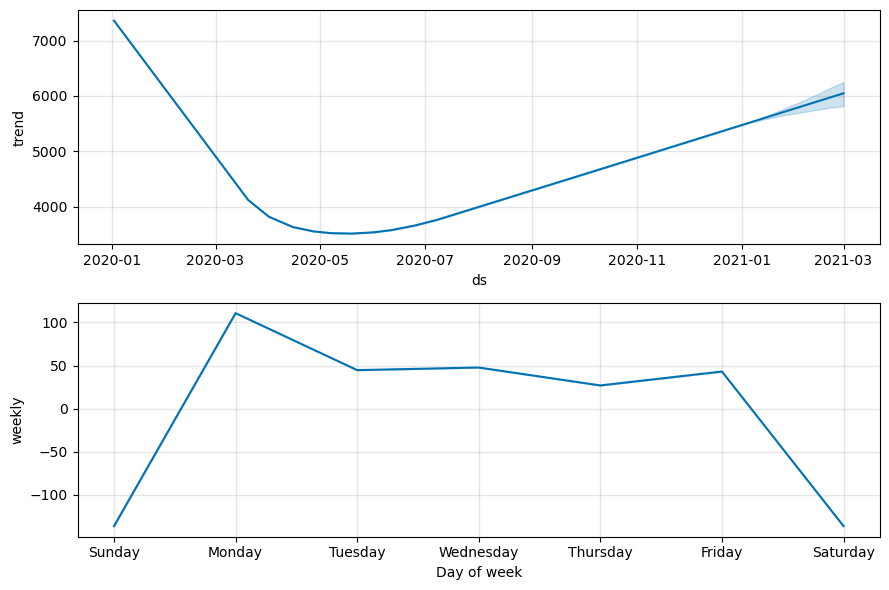

In [171]:
forecast_ccb=prophet_forecast(df_ccb_2020,df_ccb_2021)

#### Forecast for IMPJ

16:45:13 - cmdstanpy - INFO - Chain [1] start processing
16:45:13 - cmdstanpy - INFO - Chain [1] done processing


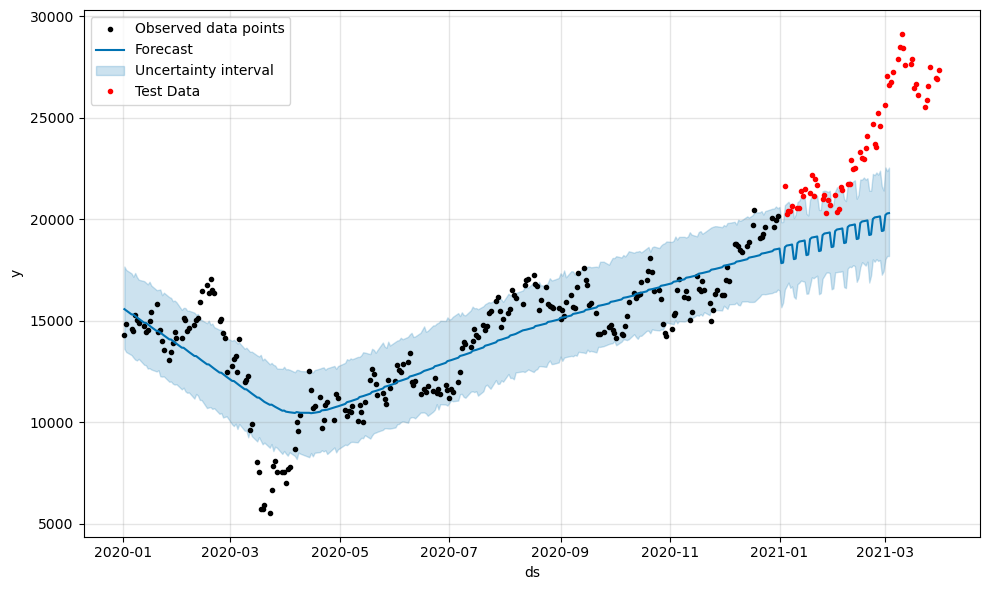

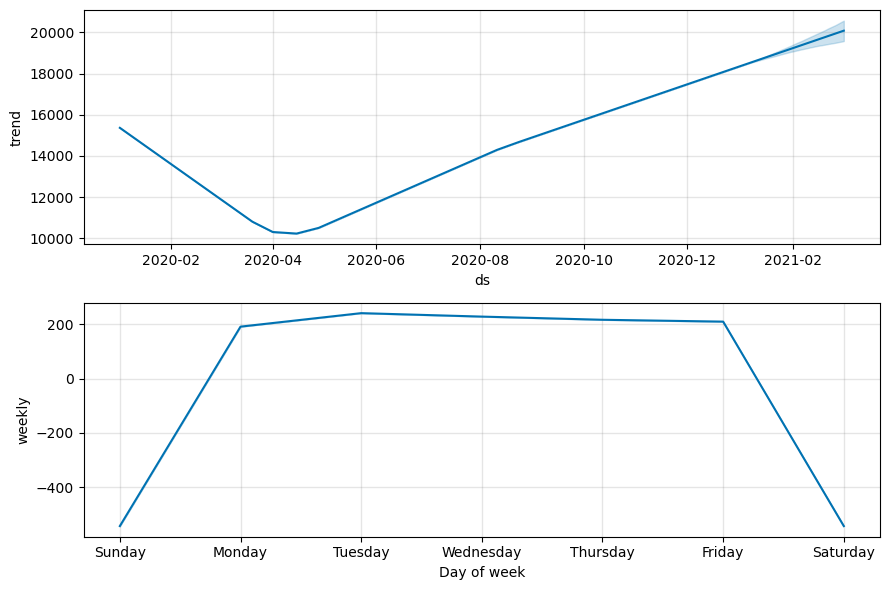

In [172]:
forecast_impj=prophet_forecast(df_impj_2020,df_impj_2021)

#### Forecast for DSMC

16:45:14 - cmdstanpy - INFO - Chain [1] start processing
16:45:14 - cmdstanpy - INFO - Chain [1] done processing


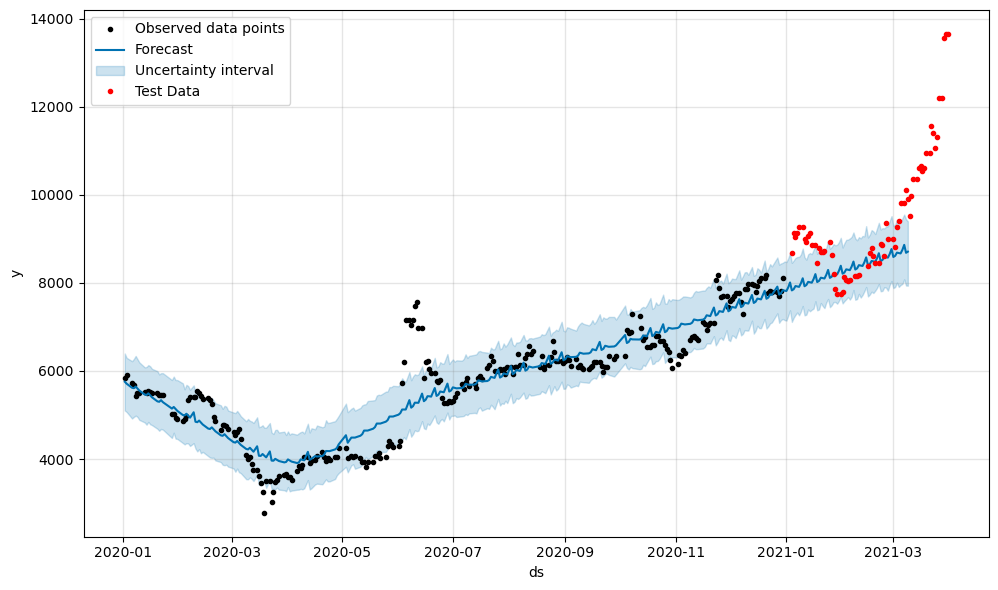

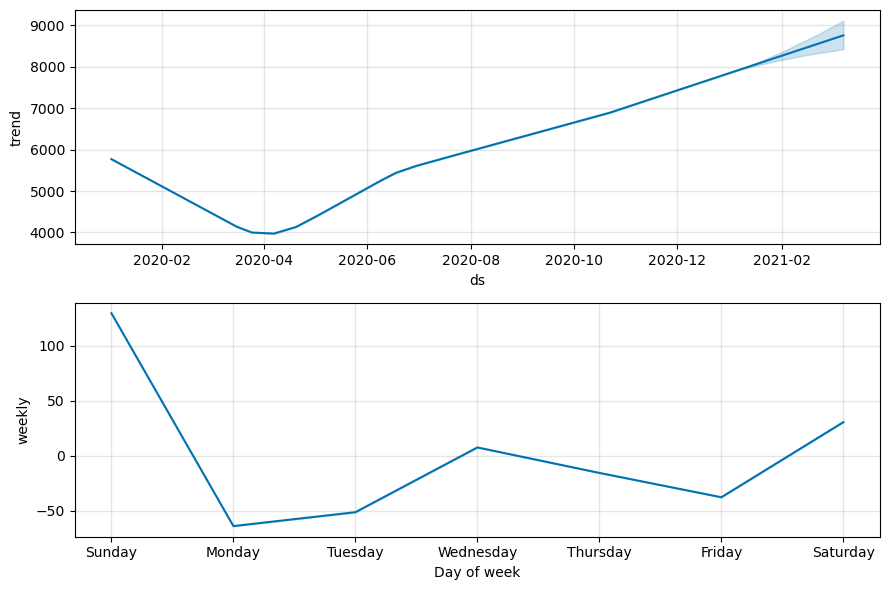

In [173]:
forecast_dsmc=prophet_forecast(df_dsmc_2020,df_dsmc_2021)